<a href="https://colab.research.google.com/github/Vaibhavpandey1709/Unemployment_rate_upto_11_2020/blob/main/Unemployment_rate_upto_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

**DATASET LOADING**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**DATASET ROWS AND COLUMNS COUNT**

In [ ]:
rows = df.shape[0]
cols = df.shape[1]
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  267
Number of Columns:  9


**DATASET INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Missing Values/Null Values**

In [ ]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [ ]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [ ]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Month'] =  df['Date'].dt.month
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))
df['MonthName'] = df['MonthNumber'].apply(lambda x : calendar.month_abbr[x])
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,MonthNumber,MonthName
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


**Statistics**

In [ ]:
df.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,MonthNumber
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915


In [ ]:
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2).style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.000000,12.240000,10.800000,0.500000,4.840000,9.650000,16.760000,75.850000
Estimated Employed,267.000000,13962105.720000,13366318.360000,117542.000000,2838930.500000,9732417.000000,21878686.000000,59433759.000000
Estimated Labour Participation Rate,267.000000,41.680000,7.850000,16.770000,37.260000,40.390000,44.060000,69.690000


In [ ]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats.style.background_gradient(cmap='Blues')

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.916000,19602366.900000,40.108750
1,North,15.889620,13072487.924051,38.702658
2,Northeast,10.950263,3617105.526316,52.055263
3,South,10.454667,14040589.333333,40.436167
4,West,8.239000,18623512.720000,41.257000


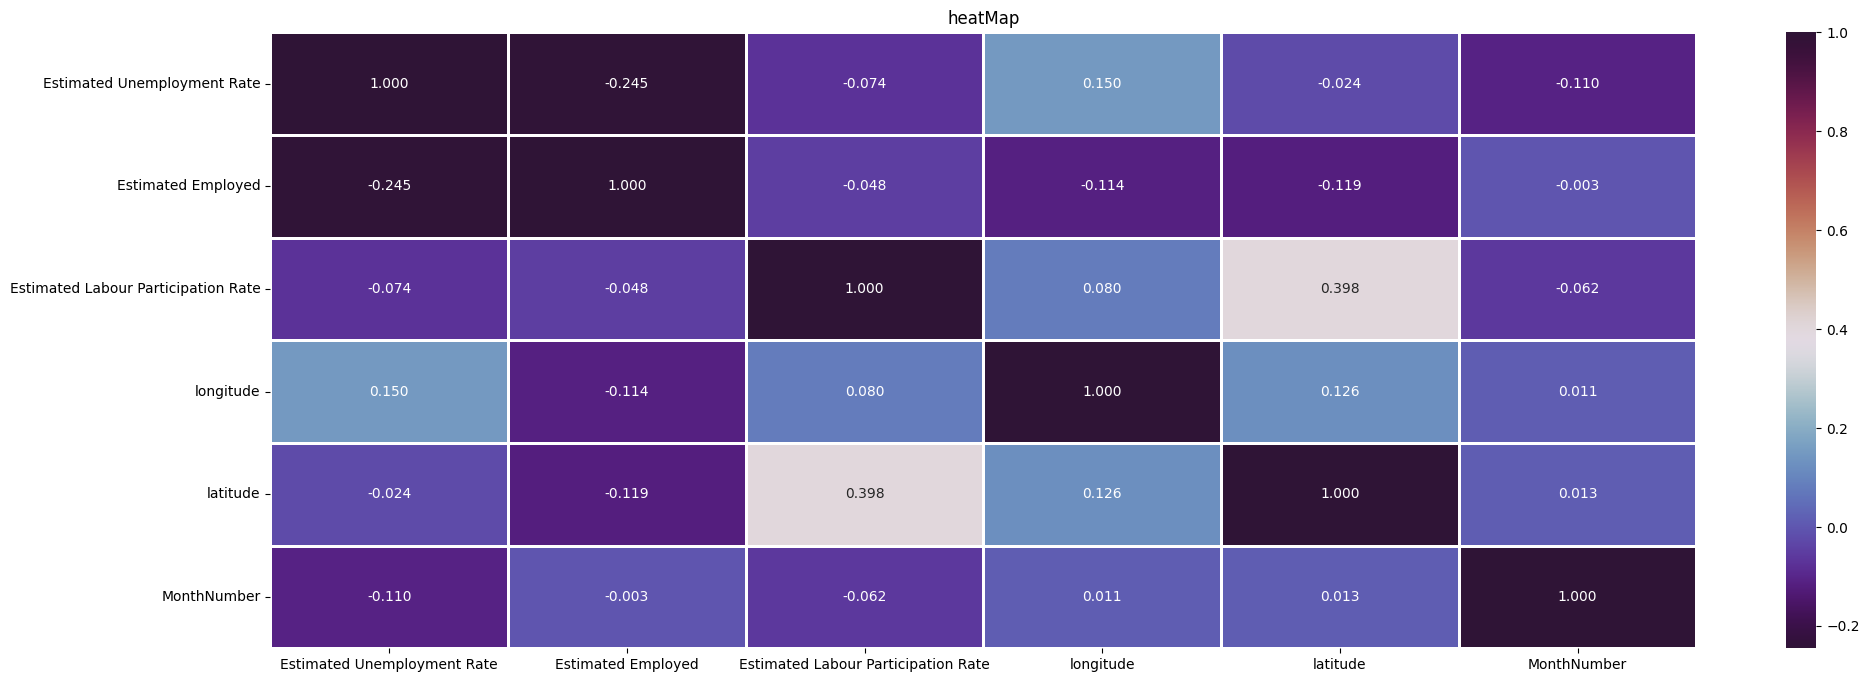

In [ ]:
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'longitude', 'latitude', 'MonthNumber']]
heatMap = heatMap.corr()
heatMap
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

**EDA - Exploratory Data Analysis**

In [ ]:
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly_dark')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], color='Region', title='Scatter Matrix Plot', template='plotly_dark')
fig.show()

In [ ]:
state_unemployment = df.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

fig = px.bar(state_unemployment.sort_values('Estimated Unemployment Rate', ascending=False),
             x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate by State', template='plotly_dark')

fig.show()

In [ ]:
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', color='MonthName',
             title='Unemployment Rate by Region and Month', template='plotly_dark',
             animation_frame='MonthNumber', animation_group='Region')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
unempDF = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
unempDF = df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index() # Use df instead of empDF
unempDF.head(4)

,Region,States,Estimated Unemployment Rate
0,East,Andhra Pradesh,NaN
1,East,Assam,NaN
2,East,Bihar,19.471
3,East,Chhattisgarh,NaN


In [ ]:
fig = px.sunburst(unempDF, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color='Estimated Unemployment Rate',
                  color_continuous_scale='viridis',
                  title='Unemployment Rate by Region and State')
fig.show()

**Impact of Lockdown on States Estimated Employee**

In [ ]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="MonthNumber",
                     projection="natural earth",scope='asia',title='Impack of lockdown on employement across regions')
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65,100],oceancolor="#6dd5ed",showocean=True)
fig.show()


In [ ]:
before_lockdown = df[(df['MonthNumber'] >=1) & (df['MonthNumber'] <=4)]
after_lockdown = df[(df['MonthNumber'] >=4) & (df['MonthNumber'] <=7)]

In [ ]:
bf_lock = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
af_lock = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown_impact = pd.merge(bf_lock,af_lock,on='States')
lockdown_impact.columns = ['States','Before Lockdown','After Lockdown']
lockdown_impact.head()

,States,Before Lockdown,After Lockdown
0,Andhra Pradesh,9.4025,12.3975
1,Assam,6.2250,6.2450
2,Bihar,20.7425,30.8025
3,Chhattisgarh,7.2450,9.6025
4,Delhi,17.6975,24.3600


In [ ]:
lockdown_impact['percentage change in unemployment'] = round(lockdown_impact['After Lockdown'] - lockdown_impact['Before Lockdown'] / lockdown_impact['Before Lockdown'],2)

In [ ]:
lockdown_impact.sort_values('percentage change in unemployment', ascending=False).style.background_gradient(cmap='Reds')

,States,Before Lockdown,After Lockdown,percentage change in unemployment
17,Puducherry,19.847500,38.437500,37.440000
10,Jharkhand,19.445000,33.725000,32.720000
2,Bihar,20.742500,30.802500,29.800000
7,Haryana,28.595000,30.780000,29.780000
23,Tripura,33.062500,25.672500,24.670000
21,Tamil Nadu,14.972500,25.500000,24.500000
4,Delhi,17.697500,24.360000,23.360000
8,Himachal Pradesh,13.657500,16.732500,15.730000
19,Rajasthan,13.932500,15.910000,14.910000
9,Jammu & Kashmir,19.120000,15.846667,14.850000


In [ ]:
lockdown_impact['percentage change in unemployment'] = round(lockdown_impact['After Lockdown'] - lockdown_impact['Before Lockdown'] / lockdown_impact['Before Lockdown'],2)
fig = px.bar(lockdown_impact.sort_values('percentage change in unemployment', ascending=False),
             x='States', y='percentage change in unemployment', color='States',
             title='% Change in Unemployment After Lockdown', template='plotly_dark')
fig.show()

In [ ]:
def sort_impact(x):
  if x <= 10:
    return 'Low Impact'
  elif x > 10 and x <=20:
    return 'Medium Impact'
  elif x > 20 and x <=30:
    return 'High Impact'
  else:
    return 'Very High Impact'

lockdown_impact['Impact Status'] = lockdown_impact['percentage change in unemployment'].apply(lambda x:sort_impact(x))
lockdown_impact.head()


,States,Before Lockdown,After Lockdown,percentage change in unemployment,Impact Status
0,Andhra Pradesh,9.4025,12.3975,11.40,Medium Impact
1,Assam,6.2250,6.2450,5.24,Low Impact
2,Bihar,20.7425,30.8025,29.80,High Impact
3,Chhattisgarh,7.2450,9.6025,8.60,Low Impact
4,Delhi,17.6975,24.3600,23.36,High Impact


In [ ]:
fig = px.bar(lockdown_impact.sort_values('percentage change in unemployment'),
             x='States',y='percentage change in unemployment',color='Impact Status',
             title='Lockdown impact on employment across states',template='plotly_dark')

fig.show()